# **Import de librairies**

In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm

# **Chargement du dataset**

In [266]:
# df = pd.read_csv("SpotifyFeatures.csv")
df = pd.read_csv("/Users/bertranddevulder/Documents/Cours/Wild_Code_School/Semaine_8_Visualisation_interactive_et_Pandas_approfondi/Projet_2/Datasets/SpotifyFeatures.csv")

# chemin sur Mac : df_spotify = pd.read_csv("/Users/bertranddevulder/Documents/Cours/Wild_Code_School/Semaine_8_Visualisation_interactive_et_Pandas_approfondi/Projet_2/Datasets/SpotifyFeatures.csv")
# chemin sur windows : df_spotify = pd.read_csv("/Users/beber/Documents/Cours/Wild_Code_School/Semaine_8_Visualisation_interactive_&_Pandas_approfondi/Projet_2/Datasets/SpotifyFeatures.csv")

# **EDA (Exploratory Data Analysis) + Nettoyage**

### **Exploration préliminaire**

In [267]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

### **Traitement des valeurs nulles**

In [269]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Une seule valeur nulle dans la colonne 'track_name'.

In [270]:
df[df['track_name'].isna()].index

Index([208285], dtype='int64')

In [271]:
df.iloc[208285]

genre                                World
artist_name              Elevation Worship
track_name                             NaN
track_id            7BGQCe62A58Q5ZgpQFX93t
popularity                              44
acousticness                         0.019
danceability                         0.287
duration_ms                         350027
energy                               0.446
instrumentalness                       0.0
key                                      F
liveness                               0.1
loudness                            -7.214
mode                                 Major
speechiness                         0.0317
tempo                              138.727
time_signature                         4/4
valence                             0.0387
Name: 208285, dtype: object

track_id = l'URI nous mène vers la track sur spotify
https://open.spotify.com/intl-fr/track/ 7BGQCe62A58Q5ZgpQFX93t 

Le titre du morceau s'appelle "None".

In [272]:
df = df.fillna('None')

### **Analyse et nettoyage des colonnes**

In [273]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

#### **Colonnes catégorielles**

In [274]:
colonnes_cat = df.select_dtypes(include=['object'])
colonnes_cat

,genre,artist_name,track_name,track_id,key,mode,time_signature
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,C#,Major,4/4
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,F#,Minor,4/4
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,C,Minor,5/4
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,C#,Major,4/4
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,F,Major,4/4
...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,D,Major,4/4
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,E,Minor,4/4
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,D,Major,4/4
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,A,Major,4/4


##### ***Genre***

In [275]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

erreur observée : "Children's Music", 'Children’s Music'

In [276]:
print(f"Il y a {df['genre'].nunique()} genres uniques dans le dataset" )

Il y a 27 genres uniques dans le dataset


In [277]:
df['genre'] = df['genre'].str.replace('’', "'", regex=False)
df['genre'] = df['genre'].str.lower().str.strip()

In [278]:
print(f"Il y a {df['genre'].nunique()} genres uniques dans le dataset" )

Il y a 26 genres uniques dans le dataset


In [279]:
# Afficher pour chaque genre les artistes associés présents dans le DataFrame

# On parcourt chaque genre unique du DataFrame (en ignorant les valeurs manquantes)
for genre in df["genre"].dropna().unique():
    print(f"--- Genre : {genre} ---")  # Affiche le nom du genre

    # Sélectionne les colonnes 'genre' et 'artist_name' pour les lignes correspondant à ce genre
    artistes_genre = df[df["genre"] == genre][["genre", "artist_name"]]

    # Affiche les 5 premiers artistes pour ce genre (modifiable selon le besoin)
    print(artistes_genre.head())

    print("\n")  # Saut de ligne pour séparer les genres

# Explications :
# - df["genre"].dropna().unique() : récupère tous les genres uniques présents dans le DataFrame, en ignorant les valeurs manquantes.
# - df[df["genre"] == genre][["genre", "artist_name"]] : filtre le DataFrame pour ne garder que les lignes du genre courant et sélectionne uniquement les colonnes 'genre' et 'artist_name'.
# - .head() : affiche seulement les 5 premiers résultats pour chaque genre.
# - print("\n") : ajoute un espace pour plus de lisibilité entre chaque genre.

# Raisonnement :
# - Ce code permet d'obtenir un aperçu rapide des artistes associés à chaque genre réellement présent dans le DataFrame, sans doublon de genres absents.
# - Tu peux modifier .head() ou supprimer cette méthode pour afficher tous les artistes si tu le souhaites.


--- Genre : movie ---
   genre        artist_name
0  movie     Henri Salvador
1  movie  Martin & les fées
2  movie    Joseph Williams
3  movie     Henri Salvador
4  movie       Fabien Nataf


--- Genre : r&b ---
    genre     artist_name
135   r&b   Mary J. Blige
136   r&b         Rihanna
137   r&b       Yung Bleu
138   r&b        Surfaces
139   r&b  Olivia O'Brien


--- Genre : a capella ---
         genre            artist_name
552  a capella         MC6 A Cappella
553  a capella  The Singers Unlimited
554  a capella         MC6 A Cappella
555  a capella         MC6 A Cappella
556  a capella                   Glad


--- Genre : alternative ---
           genre  artist_name
671  alternative         Joji
672  alternative         Joji
673  alternative         Joji
674  alternative  Oliver Tree
675  alternative         Joji


--- Genre : country ---
       genre   artist_name
688  country           Cam
689  country  Kevin Fowler
690  country  Roger Miller
691  country       M. Ward
692  

constat d'incohérence probant :imprim écran Céline Dion ou Francis Lalane 

In [280]:
df_Celine_Dion = df[df["artist_name"] == "Céline Dion"]
df_Celine_Dion.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
14058,dance,Céline Dion,"Because You Loved Me (Theme from ""Up Close and...",1NOeZ7ZIVKMebuza26rofd,74,0.31400,0.614,273667,0.466,0.000000,C#,0.0990,-9.881,Major,0.0327,119.916,4/4,0.1780
15076,dance,Céline Dion,The Power of Love,5kK1Iru9ogP3Iy1zsANU1n,67,0.36000,0.546,342400,0.519,0.000460,G#,0.2400,-9.072,Major,0.0291,140.054,4/4,0.2470
15644,dance,Céline Dion,That's the Way It Is,5s4catxeZsaWFnOrvrXZHf,64,0.15400,0.634,241373,0.886,0.000000,A,0.1180,-5.424,Major,0.0434,93.040,4/4,0.5770
15864,dance,Céline Dion,All By Myself,20EpQjfV7B4ZQJkIdHO1Tw,65,0.34800,0.344,312307,0.325,0.023900,B,0.0686,-10.005,Minor,0.0287,118.556,4/4,0.0773
16656,dance,Céline Dion,The Power of Love - Radio Edit,2PFAYhBcNRj1UaluR7ZgUy,63,0.36900,0.536,286893,0.523,0.000525,G#,0.2270,-8.885,Major,0.0306,140.059,4/4,0.2360
16852,dance,Céline Dion,I'm Alive,3qjXFLKMp4zfMmugEGPaBx,63,0.02470,0.691,210227,0.640,0.000005,G#,0.2000,-5.087,Major,0.0384,101.991,4/4,0.4520
18176,dance,Céline Dion,To Love You More - Radio Edit,0UEqov6I69uqwBG6J2wMwC,56,0.29800,0.494,279360,0.596,0.000000,A,0.2190,-6.641,Major,0.0311,119.971,4/4,0.1660
18800,dance,Céline Dion,I Drove All Night,3zN4OLeBAN7LwAr442bB8E,56,0.00051,0.566,240600,0.912,0.000000,B,0.2150,-4.198,Major,0.0629,134.994,4/4,0.6440
18948,dance,Céline Dion,A New Day Has Come - Radio Remix,1vmdrRKK1sY1pyzbMeoPwq,56,0.08260,0.574,259773,0.691,0.000017,F#,0.1490,-5.103,Major,0.0350,91.969,4/4,0.1950
19133,dance,Céline Dion,Pour que tu m'aimes encore,4iNAWrVbJI431V9YVyZ4wR,44,0.32600,0.537,254093,0.602,0.000115,D,0.0548,-8.937,Major,0.0700,180.077,4/4,0.5090


In [281]:
df_Francis_Lalanne = df[df["artist_name"] == "Francis Lalanne"]
df_Francis_Lalanne

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
54368,movie,Francis Lalanne,Fin du contrat Warner (Interview),0DpSewGIIgN8XF7HI97B7N,0,0.6900,0.516,134053,0.428000,0.000021,C,0.6340,-21.956,Major,0.9160,77.011,1/4,0.2000
55494,movie,Francis Lalanne,Il pleure dans mon cœur - Paul Verlaine,2SHdh3qN7gGPJGWHFEnp0n,4,0.4330,0.301,128000,0.164000,0.145000,G,0.1020,-18.894,Minor,0.0373,74.799,3/4,0.1540
55583,movie,Francis Lalanne,Sa famille. Changement de vie (Interview),2eZahkqBTze9HTbBQfOMDX,0,0.8080,0.540,245627,0.500000,0.000001,F#,0.4230,-21.266,Major,0.9170,82.569,4/4,0.4580
55715,movie,Francis Lalanne,La maison du bonheur,5ZU4BhQcPL4BufC5gxc360,1,0.2410,0.154,331347,0.412000,0.000002,B,0.8180,-10.434,Major,0.0384,74.562,4/4,0.1020
55757,movie,Francis Lalanne,Quand je chante - Live,0gMf3M9tUTBG6QY6mEJOwD,3,0.7440,0.477,107933,0.082800,0.000000,C#,0.5270,-20.658,Major,0.3100,79.899,3/4,0.3050
55800,movie,Francis Lalanne,Avec le temps,4P72CXog5XH4vTtmXDVifJ,0,0.5970,0.247,260120,0.341000,0.001020,A,0.0960,-9.333,Minor,0.0320,72.659,4/4,0.2040
55822,movie,Francis Lalanne,Ce Moment d'Etre,6AnkHqBGJXdqbiqdY5RxRS,0,0.6610,0.237,239853,0.283000,0.000012,E,0.1050,-14.632,Major,0.0414,83.347,4/4,0.1610
55833,movie,Francis Lalanne,Genèse de l’album « À Léo » (Interview),79dGGaddu5FsdmlWufEEgN,0,0.9110,0.500,211053,0.489000,0.000000,D,0.6620,-19.386,Major,0.9430,78.138,3/4,0.5770
55998,movie,Francis Lalanne,Reniements,7rZDKamibehUwi1UCkaz1G,0,0.8040,0.309,211093,0.174000,0.000000,D,0.1140,-16.093,Minor,0.0476,86.441,5/4,0.2090
56216,movie,Francis Lalanne,Si Tu Te Moques D'Un Mec Qui Pleure,1AyXoelFwXegavvJpbguZx,1,0.8100,0.453,342160,0.084700,0.000000,G,0.0808,-18.086,Major,0.1220,77.698,3/4,0.1320


In [282]:
df_Cocteau_Twins = df[df["artist_name"] == "Cocteau Twins"]
df_Cocteau_Twins

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
10230,alternative,Cocteau Twins,Cherry-coloured Funk,6sVQNUvcVFTXvlk3ec0ngd,57,0.001740,0.377,192467,0.650,0.000058,D,0.1070,-5.902,Major,0.0290,180.074,4/4,0.365
20391,dance,Cocteau Twins,Cherry-coloured Funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.001740,0.377,192467,0.650,0.000058,D,0.1070,-5.902,Major,0.0290,180.074,4/4,0.365
22947,electronic,Cocteau Twins,Cherry-coloured Funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.001740,0.377,192467,0.650,0.000058,D,0.1070,-5.902,Major,0.0290,180.074,4/4,0.365
23984,electronic,Cocteau Twins,Heaven Or Las Vegas,1bwXRScnt3k6vSyVqcKyNj,54,0.000088,0.215,298400,0.801,0.007250,G,0.0808,-5.460,Major,0.0379,180.090,4/4,0.401
25239,electronic,Cocteau Twins,Pitch The Baby,3BJqEsMJ6gxMRNBr6DJAq8,49,0.445000,0.480,194080,0.827,0.341000,G,0.5600,-6.712,Minor,0.0414,178.136,4/4,0.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220885,world,Cocteau Twins,Alice,4mfNiZl9qisxdLiLHIRa4n,29,0.960000,0.363,267827,0.368,0.950000,A#,0.0538,-11.770,Minor,0.0307,138.888,4/4,0.190
220891,world,Cocteau Twins,Fluffy Tufts,2OG3twfyEivK0sPylA3jmO,34,0.952000,0.389,185667,0.202,0.007610,F#,0.2180,-17.350,Minor,0.0356,99.836,4/4,0.252
220958,world,Cocteau Twins,Athol-brose,6FwoAekQelrCxhP9tVu1ju,36,0.000574,0.481,179280,0.625,0.788000,F,0.1240,-5.816,Major,0.0383,120.078,4/4,0.437
221353,world,Cocteau Twins,Amelia,5QO4lhAf3vWJbnJBGxzPNK,34,0.000221,0.239,211667,0.659,0.364000,D#,0.0791,-10.474,Major,0.0390,176.563,3/4,0.394


Enrichissement à prévoir sur la colonne genre pour avoir plus de cohérence et retrouver la variété française.

##### ***Artist name***


In [283]:
print(f"Il y a {df['artist_name'].nunique()} noms d'artistes uniques dans ce dataset.")

Il y a 14564 noms d'artistes uniques dans ce dataset.


In [284]:
df['artist_name'].value_counts().head(28)

artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
Wolfgang Amadeus Mozart      800
Randy Newman                 757
Georges Bizet                701
Juice Music                  684
Johann Sebastian Bach        632
Ludwig van Beethoven         596
Hans Zimmer                  559
Gioachino Rossini            491
Chorus                       480
Howard Shore                 479
Drake                        477
Henri Salvador               474
John Williams                450
Frédéric Chopin              436
Alan Menken                  420
Chris Brown                  392
Bob Marley & The Wailers     380
Dorothée                     378
Gaetano Donizetti            377
Children Songs Company       371
Max Richter                  365
Capcom Sound Team            326
Future                       317
Name: count, dtype: int64

In [285]:
df['artist_name'] = df['artist_name'].str.replace('’', "'",  regex=False)  # apostrophe typographique
df['artist_name'] = df['artist_name'].str.lower().str.strip()  # minuscule + suppression espaces    

In [286]:
print(f"Il y a {df['artist_name'].nunique()} noms d'artistes uniques dans ce dataset.")

Il y a 14561 noms d'artistes uniques dans ce dataset.


Voir si pas d'autres fautes orthographes : 
- & et and par exemple.
- retirer The

L'artiste au plus grand nombre de titres dans le dataset est Verdi qui en compte 1394.

Voir 

##### ***Track name***

In [287]:
print(f"Il y a {df['track_name'].nunique()} noms de titres uniques dans ce dataset.")

Il y a 148615 noms de titres uniques dans ce dataset.


In [288]:
df['track_name'] = df['track_name'].str.replace('’', "'",  regex=False)  # apostrophe typographique
df['track_name'] = df['track_name'].str.lower().str.strip()  # minuscule + suppression espaces    

In [289]:
print(f"Il y a {df['track_name'].nunique()} noms de titres uniques dans ce dataset.")

Il y a 145281 noms de titres uniques dans ce dataset.


Voir d'autres fautes d'orthographes.

#####  ***Track id***

In [290]:
print(f"Il y a {df['track_id'].nunique()} URI uniques dans ce dataset.")

Il y a 176774 URI uniques dans ce dataset.


In [291]:
df['track_id'].value_counts().head(28)

track_id
3R73Y7X53MIQZWnKloWq5i    8
0wY9rA9fJkuESyYm9uzVK5    8
6sVQNUvcVFTXvlk3ec0ngd    8
0UE0RhnRaEYsiYgXpyLoZc    8
6AIte2Iej1QKlaofpjCzW1    8
3uSSjnDMmoyERaAK9KvpJR    8
6INaSJ4clfZ8pvXSGZQnJ7    7
6M6UoxIPn4NOWW0x7JPRfv    7
2qtoRFCOEL1gRn5q9DJC7F    7
3GZD6HmiNUhxXYf8Gch723    7
6wIjQNc12WD1EoTlX0VmM6    7
4hh1lvWiUaLMOcVXhyK6TA    7
5gW5dSy3vXJxgzma4rQuzH    7
360NCp4XoQ0sFi5jgu5Ww7    7
2q0VexHJirnUPnEOhr2DxK    7
3Zau3JcrZcBfw8aVjKGkSX    7
56RfNBJGUgL1ZFCB1KEJrQ    7
2073QOEC8rBtSyTsRyaWiP    7
56z2qI0gKcPthQF6l8AW3E    7
49FPqdT0kmE3KWGlDmSjQp    7
6gtNiLJNLBcV0P6Juenstp    7
3nXrCAE44KlevAkQB2XWcN    7
2gE0khQ948RYQOeTgCUL2a    7
5NijSs5dAwaIybq1GaRTIe    7
3KN0D3jPB4Hqi1xyuOoeKL    7
0iTpQYzJnYgh7kIxyq8A2O    7
7qCZgvV98j6RjUULW1s1it    7
52a6VcF23v5HB7KfDEmBHq    7
Name: count, dtype: int64

In [292]:
# track_id = l'URI nous mène vers la track sur spotify
# https://open.spotify.com/intl-fr/track/ 7BGQCe62A58Q5ZgpQFX93t 

In [ ]:
# https://musicstax.com/track/ + Track ID

##### **Analyse croisée artist_name / track_name :**

In [293]:
df[df['artist_name'] == 'Giuseppe Verdi']['track_name'].value_counts().head(10)

Series([], Name: count, dtype: int64)

En prenant Verdi pour exemple on observe qu'un même titre peut apparaitre plusieurs fois dans le dataset.

Pour éviter les doublons, nous conservons la version la plus populaire pour chaque couple track_name / artist_name.

In [294]:
df= df.loc[df.groupby(['track_name', 'artist_name'])['popularity'].idxmax()]
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 175614 lignes.


##### ***Key***

In [295]:
df['key'].unique()

array(['F', 'C#', 'G#', 'C', 'D', 'D#', 'G', 'B', 'A#', 'A', 'E', 'F#'],
      dtype=object)

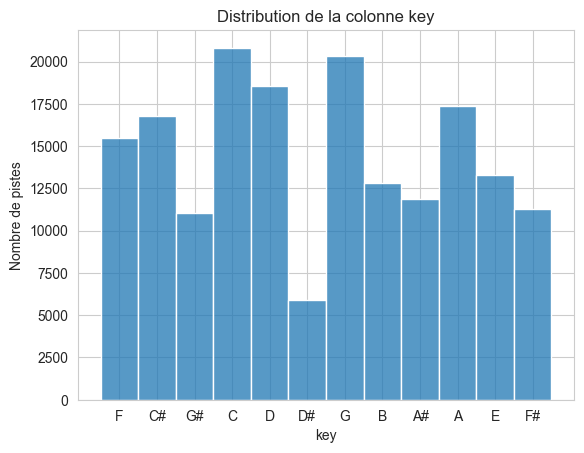

In [296]:
counts_key = df['key'].value_counts()
sns.histplot(data=df, x="key")
plt.title('Distribution de la colonne key')
plt.xlabel('key')
plt.ylabel('Nombre de pistes')
plt.show()

/var/folders/7b/wn5b7pmd0t70kkrt6_dngksw0000gn/T/ipykernel_3669/2659825684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


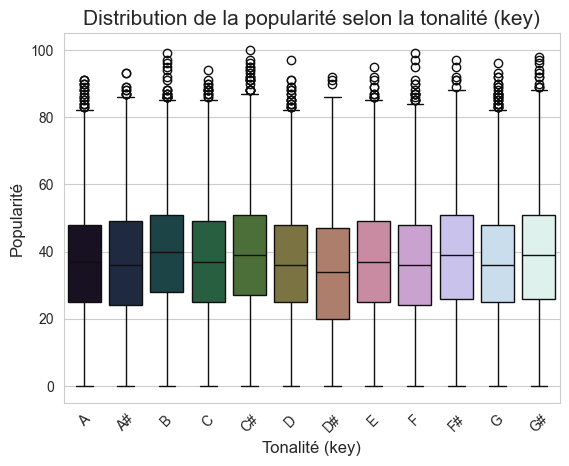

In [297]:
# Boxplot pour la variable "key"
# Objectif : visualiser la distribution d'une variable numérique (par exemple "popularity") selon chaque tonalité ("key")

sns.set_style("whitegrid")  # Ajoute une grille de fond pour une meilleure lisibilité

# Création du boxplot : on affiche la distribution de la popularité pour chaque "key"
ax = sns.boxplot(
    data=df,                  # DataFrame contenant les données
    x="key",                          # Variable catégorielle sur l'axe des x (tonalité)
    y="popularity",                   # Variable numérique sur l'axe des y (exemple : popularité)
    palette="cubehelix",              # Palette de couleurs pour différencier les tonalités
    order=sorted(df["key"].unique())  # Trie les tonalités pour un affichage ordonné
)

# Ajout d'un titre et de labels explicites pour les axes
plt.title('Distribution de la popularité selon la tonalité (key)', fontsize=15)
plt.xlabel('Tonalité (key)', fontsize=12)
plt.ylabel('Popularité', fontsize=12)

# Optionnel : rotation des labels x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichage du graphique final
plt.show()

Voir les corrélations avec mode et valence dans la suite de l'analyse.

Commentaire d'analyse

##### ***Mode***

In [298]:
df["mode"].unique()

array(['Major', 'Minor'], dtype=object)

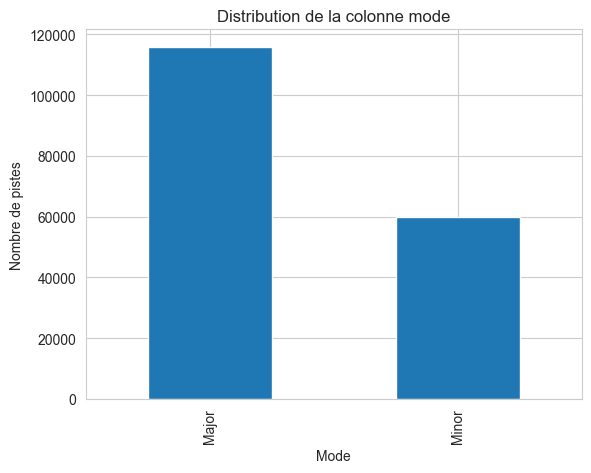

In [299]:
counts = df['mode'].value_counts()
counts.plot(kind='bar')
plt.title('Distribution de la colonne mode')
plt.xlabel('Mode')
plt.ylabel('Nombre de pistes')
plt.show()

COmmentaires?

##### ***Time signature***

In [300]:
df['time_signature'].describe()

count     175614
unique         5
top          4/4
freq      148228
Name: time_signature, dtype: object

In [301]:
df['time_signature'].unique()

array(['4/4', '3/4', '5/4', '1/4', '0/4'], dtype=object)

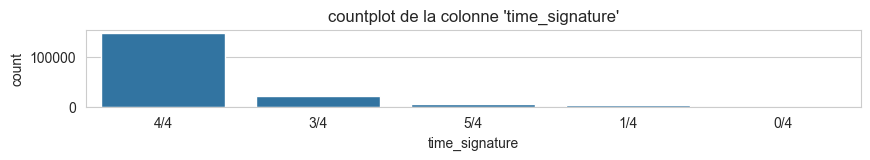

In [302]:
plt.figure(figsize=(10, 1))
sns.countplot(x=df['time_signature'])
plt.title("countplot de la colonne 'time_signature'")
plt.show()

- je supprime les valeurs aberrantes 0 Impossible en musique → à supprimer
- et 1 Musicalement peu plausible → probablement une erreur de parsing ou un tag incohérent

Verifier 1/4 si la valeur n'est pas mal enregistrée.

In [303]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4/4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3/4,0.0835
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4/4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4/4,0.4230
33675,anime,yuki hayashi,"""6人で(強い方が強い)""",0qwK0LvMyAQ7J1rEEL6nbr,17,0.971000,0.176,171000,0.125,0.904000,C,0.129,-16.699,Major,0.0349,136.076,3/4,0.0461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4/4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4/4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4/4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4/4,0.2740


In [397]:
df[df['time_signature'] == "1/4"]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
57709,opera,giuseppe verdi,"""libiamo ne'lieti calici""",2zGVfygrdGVKCZ54sxCaQH,38,0.9670,0.395,167027,0.246,0.000008,A#,0.5050,-16.601,Major,0.0644,110.022,1/4,0.2080,1/4
226929,soul,rajitheone,#whitegirlvoice,4TkGhMYlkcbxCMj3pny9mU,47,0.6200,0.497,253079,0.446,0.000000,F#,0.0913,-9.842,Minor,0.4750,90.854,1/4,0.3130,1/4
187847,ska,soda stereo,(en) el séptimo día - remasterizado 2007,4xVZmLJtBTedcXbDB3qYdX,48,0.0018,0.582,263280,0.864,0.000578,E,0.1700,-6.356,Major,0.0260,106.191,1/4,0.8900,1/4
15722,dance,kim petras,"1,2,3 dayz up (feat. sophie)",0KK1FJFCBjdgPE00CJuvEG,66,0.0583,0.785,213678,0.592,0.000028,C#,0.1310,-5.139,Major,0.0363,107.992,1/4,0.8840,1/4
104702,classical,ludwig van beethoven,"11 bagatelles, op. 119: no. 9 in a minor",0f4iSufBua33qJScoLp5Kg,22,0.9910,0.366,30320,0.122,0.953000,A,0.1430,-23.236,Minor,0.0448,142.056,1/4,0.3380,1/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,anime,hiroyuki sawano,凸】♀】♂】←titan,1sxV3W2udWG44iPEgRuEzp,39,0.0127,0.585,261373,0.450,0.675000,D,0.0921,-11.736,Major,0.0574,139.574,1/4,0.3420,1/4
167109,classical,joe hisaishi,千と千尋の神隠し組曲(ii. 竜の少年),7oBzP8zVPh4djipfVgBhdR,33,0.9390,0.522,71667,0.434,0.706000,C,0.1610,-7.526,Minor,0.0289,112.204,1/4,0.4710,1/4
31582,anime,yuki hayashi,君を超えて,04LPaVRfnDvIOYLch8BvNK,21,0.4340,0.190,132600,0.487,0.823000,A,0.1100,-12.733,Minor,0.0431,91.553,1/4,0.1860,1/4
31377,anime,capcom sound team,月震/ナバルデウス,6BNBRAyd0exvdQKERYLQDG,22,0.0474,0.566,217893,0.701,0.803000,D,0.0871,-11.194,Major,0.0381,128.107,1/4,0.3690,1/4


In [379]:
masque_time_signature_1_4 = df[df['time_signature'] == "1/4"]
masque_time_signature_1_4

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
57709,opera,giuseppe verdi,"""libiamo ne'lieti calici""",2zGVfygrdGVKCZ54sxCaQH,38,0.9670,0.395,167027,0.246,0.000008,A#,0.5050,-16.601,Major,0.0644,110.022,1/4,0.2080,1/4
226929,soul,rajitheone,#whitegirlvoice,4TkGhMYlkcbxCMj3pny9mU,47,0.6200,0.497,253079,0.446,0.000000,F#,0.0913,-9.842,Minor,0.4750,90.854,1/4,0.3130,1/4
187847,ska,soda stereo,(en) el séptimo día - remasterizado 2007,4xVZmLJtBTedcXbDB3qYdX,48,0.0018,0.582,263280,0.864,0.000578,E,0.1700,-6.356,Major,0.0260,106.191,1/4,0.8900,1/4
15722,dance,kim petras,"1,2,3 dayz up (feat. sophie)",0KK1FJFCBjdgPE00CJuvEG,66,0.0583,0.785,213678,0.592,0.000028,C#,0.1310,-5.139,Major,0.0363,107.992,1/4,0.8840,1/4
104702,classical,ludwig van beethoven,"11 bagatelles, op. 119: no. 9 in a minor",0f4iSufBua33qJScoLp5Kg,22,0.9910,0.366,30320,0.122,0.953000,A,0.1430,-23.236,Minor,0.0448,142.056,1/4,0.3380,1/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,anime,hiroyuki sawano,凸】♀】♂】←titan,1sxV3W2udWG44iPEgRuEzp,39,0.0127,0.585,261373,0.450,0.675000,D,0.0921,-11.736,Major,0.0574,139.574,1/4,0.3420,1/4
167109,classical,joe hisaishi,千と千尋の神隠し組曲(ii. 竜の少年),7oBzP8zVPh4djipfVgBhdR,33,0.9390,0.522,71667,0.434,0.706000,C,0.1610,-7.526,Minor,0.0289,112.204,1/4,0.4710,1/4
31582,anime,yuki hayashi,君を超えて,04LPaVRfnDvIOYLch8BvNK,21,0.4340,0.190,132600,0.487,0.823000,A,0.1100,-12.733,Minor,0.0431,91.553,1/4,0.1860,1/4
31377,anime,capcom sound team,月震/ナバルデウス,6BNBRAyd0exvdQKERYLQDG,22,0.0474,0.566,217893,0.701,0.803000,D,0.0871,-11.194,Major,0.0381,128.107,1/4,0.3690,1/4


In [395]:
masque_time_signature_1_4.iloc[0:500000:5]


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
57709,opera,giuseppe verdi,"""libiamo ne'lieti calici""",2zGVfygrdGVKCZ54sxCaQH,38,0.9670,0.395,167027,0.246,0.000008,A#,0.5050,-16.601,Major,0.0644,110.022,1/4,0.2080,1/4
123229,classical,frédéric chopin,"12 études, op. 25: étude no. 11 in a minor",7esn1ri1DxPW63sr63cP6L,48,0.9670,0.328,211907,0.203,0.895000,A,0.1100,-21.742,Minor,0.0357,91.760,1/4,0.1040,1/4
130810,classical,gabriel kahane,8980,543b9Kdoc2HyN5BE6ouSRK,25,0.9680,0.532,192862,0.115,0.000548,G,0.1070,-13.627,Major,0.0697,110.925,1/4,0.3730,1/4
204264,soundtrack,john lunn,a grand adventure,6UO9QuVPtGzeGgPidfOMEF,27,0.9330,0.330,204600,0.291,0.880000,G,0.1730,-12.553,Major,0.0322,87.929,1/4,0.1410,1/4
181785,movie,lea salonga,a whole new world,5VIfacsWytkcgr7aTt8Tql,61,0.8200,0.275,160800,0.248,0.000005,C,0.1010,-15.637,Major,0.0364,112.496,1/4,0.1430,1/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230730,soul,parliament,wizard of finance,7Gm4XZ7jOGe8AeAs6is78s,40,0.4420,0.743,264907,0.503,0.001670,F#,0.0486,-12.959,Major,0.0462,118.524,1/4,0.9660,1/4
140450,indie,king gizzard & the lizard wizard,work this time,3VDRXEOQDjBsQyzbFs1qGa,57,0.1530,0.526,276893,0.489,0.103000,C#,0.1350,-6.249,Minor,0.2200,113.913,1/4,0.5300,1/4
146246,jazz,bill frisell,you've got to hide your love away,6HuzSP4QnbA3YixSgHG7IJ,47,0.4140,0.248,310867,0.418,0.302000,G,0.1110,-8.230,Major,0.0272,80.061,1/4,0.1570,1/4
36895,electronic,venetian snares,öngyilkos vasárnap,2OvaBJipptu59Tw08pqZgp,30,0.0597,0.729,206160,0.874,0.440000,A#,0.1740,-4.664,Minor,0.2700,143.976,1/4,0.5660,1/4


In [412]:
masque_time_signature_1_4.iloc[575:1350:2]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
197761,soundtrack,john williams,sayuri's theme,66EIPOdC3UZZCJdiUSRo92,55,0.90500,0.222,91493,0.117,0.91900,D,0.1110,-20.966,Major,0.0433,91.624,1/4,0.0883,1/4
79586,opera,josé carreras,se'n va anar,68yMGK1jtKvC68LidGJiba,22,0.97600,0.247,292680,0.243,0.00588,G,0.4440,-14.360,Minor,0.0369,131.721,1/4,0.1170,1/4
31728,anime,yasuharu takanashi,seirei kassen,1bvGIbJzqWALajwmGN6MMp,21,0.00003,0.466,127067,0.955,0.93000,D,0.1830,-5.086,Major,0.0633,155.023,1/4,0.3990,1/4
147018,jazz,plini,selenium forest,18pIsa1XH5Eap4SBcSH4Xd,50,0.06530,0.471,365641,0.717,0.89700,D#,0.2840,-7.731,Minor,0.0388,149.981,1/4,0.3560,1/4
129620,classical,george frideric handel,"serse / act 1 hwv40: ""ombra mai fu""",56S04BxQD4FsePfNQIt6Cd,35,0.95000,0.122,183267,0.137,0.84000,E,0.1160,-21.780,Major,0.0427,89.821,1/4,0.0458,1/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38131,electronic,flying lotus,your potential//the beyond,4AcxKBCnWb7agPVX2ABb1y,30,0.13400,0.198,105978,0.690,0.90200,B,0.1080,-6.708,Minor,0.0363,129.058,1/4,0.2600,1/4
37888,electronic,boards of canada,zoetrope,4heRvNNnsyAY1pl4c4EOIx,31,0.97100,0.801,318880,0.649,0.81000,C,0.0886,-16.399,Major,0.0636,160.045,1/4,0.2280,1/4
28169,anime,hiroyuki sawano,凸】♀】♂】←titan,1sxV3W2udWG44iPEgRuEzp,39,0.01270,0.585,261373,0.450,0.67500,D,0.0921,-11.736,Major,0.0574,139.574,1/4,0.3420,1/4
31582,anime,yuki hayashi,君を超えて,04LPaVRfnDvIOYLch8BvNK,21,0.43400,0.190,132600,0.487,0.82300,A,0.1100,-12.733,Minor,0.0431,91.553,1/4,0.1860,1/4


In [368]:
df[df.loc[::, 'time_signature'] == "1/4"]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
57709,opera,giuseppe verdi,"""libiamo ne'lieti calici""",2zGVfygrdGVKCZ54sxCaQH,38,0.9670,0.395,167027,0.246,0.000008,A#,0.5050,-16.601,Major,0.0644,110.022,1/4,0.2080,1/4
226929,soul,rajitheone,#whitegirlvoice,4TkGhMYlkcbxCMj3pny9mU,47,0.6200,0.497,253079,0.446,0.000000,F#,0.0913,-9.842,Minor,0.4750,90.854,1/4,0.3130,1/4
187847,ska,soda stereo,(en) el séptimo día - remasterizado 2007,4xVZmLJtBTedcXbDB3qYdX,48,0.0018,0.582,263280,0.864,0.000578,E,0.1700,-6.356,Major,0.0260,106.191,1/4,0.8900,1/4
15722,dance,kim petras,"1,2,3 dayz up (feat. sophie)",0KK1FJFCBjdgPE00CJuvEG,66,0.0583,0.785,213678,0.592,0.000028,C#,0.1310,-5.139,Major,0.0363,107.992,1/4,0.8840,1/4
104702,classical,ludwig van beethoven,"11 bagatelles, op. 119: no. 9 in a minor",0f4iSufBua33qJScoLp5Kg,22,0.9910,0.366,30320,0.122,0.953000,A,0.1430,-23.236,Minor,0.0448,142.056,1/4,0.3380,1/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,anime,hiroyuki sawano,凸】♀】♂】←titan,1sxV3W2udWG44iPEgRuEzp,39,0.0127,0.585,261373,0.450,0.675000,D,0.0921,-11.736,Major,0.0574,139.574,1/4,0.3420,1/4
167109,classical,joe hisaishi,千と千尋の神隠し組曲(ii. 竜の少年),7oBzP8zVPh4djipfVgBhdR,33,0.9390,0.522,71667,0.434,0.706000,C,0.1610,-7.526,Minor,0.0289,112.204,1/4,0.4710,1/4
31582,anime,yuki hayashi,君を超えて,04LPaVRfnDvIOYLch8BvNK,21,0.4340,0.190,132600,0.487,0.823000,A,0.1100,-12.733,Minor,0.0431,91.553,1/4,0.1860,1/4
31377,anime,capcom sound team,月震/ナバルデウス,6BNBRAyd0exvdQKERYLQDG,22,0.0474,0.566,217893,0.701,0.803000,D,0.0871,-11.194,Major,0.0381,128.107,1/4,0.3690,1/4


In [305]:
df['time_signature_clean'] = df['time_signature']
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4/4,0.0394,4/4
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3/4,0.0835,3/4
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4/4,0.3240,4/4
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4/4,0.4230,4/4
33675,anime,yuki hayashi,"""6人で(強い方が強い)""",0qwK0LvMyAQ7J1rEEL6nbr,17,0.971000,0.176,171000,0.125,0.904000,C,0.129,-16.699,Major,0.0349,136.076,3/4,0.0461,3/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4/4,0.6120,4/4
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4/4,0.1550,4/4
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4/4,0.6510,4/4
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4/4,0.2740,4/4


OK. Les morceaux avec la signature 1/4 sont bien des morceaux avec cetet signature. Ils ne faux pas supprimer ces morceaux du Datasets.

In [413]:
# Extraire uniquement le numérateur de la signature (4, 5, 3, etc.) pour en faire une colonne numérique propre.
# Étape 1 : Extraire la partie avant le '/' et la convertir en entier
df['time_signature_clean'] = df['time_signature'].str.extract(r'^(\d+)').astype('Int64')
df['time_signature'] = df['time_signature_clean']
df.drop(columns='time_signature_clean', inplace=True)


df = df[df['time_signature'].isin([1, 3, 4, 5])]
df

/var/folders/7b/wn5b7pmd0t70kkrt6_dngksw0000gn/T/ipykernel_3669/3621727122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_signature_clean'] = df['time_signature'].str.extract(r'^(\d+)').astype('Int64')
/var/folders/7b/wn5b7pmd0t70kkrt6_dngksw0000gn/T/ipykernel_3669/3621727122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_signature'] = df['time_signature_clean']
/var/folders/7b/wn5b7pmd0t70kkrt6_dngksw0000gn/T/ipykernel_3669/3621727122.py:5: SettingWithCopyWarning: 
A value is tr

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [416]:
type(df['time_signature'].values)

pandas.core.arrays.integer.IntegerArray

In [414]:
df[df['time_signature'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
57709,opera,giuseppe verdi,"""libiamo ne'lieti calici""",2zGVfygrdGVKCZ54sxCaQH,38,0.9670,0.395,167027,0.246,0.000008,A#,0.5050,-16.601,Major,0.0644,110.022,1,0.2080
226929,soul,rajitheone,#whitegirlvoice,4TkGhMYlkcbxCMj3pny9mU,47,0.6200,0.497,253079,0.446,0.000000,F#,0.0913,-9.842,Minor,0.4750,90.854,1,0.3130
187847,ska,soda stereo,(en) el séptimo día - remasterizado 2007,4xVZmLJtBTedcXbDB3qYdX,48,0.0018,0.582,263280,0.864,0.000578,E,0.1700,-6.356,Major,0.0260,106.191,1,0.8900
15722,dance,kim petras,"1,2,3 dayz up (feat. sophie)",0KK1FJFCBjdgPE00CJuvEG,66,0.0583,0.785,213678,0.592,0.000028,C#,0.1310,-5.139,Major,0.0363,107.992,1,0.8840
104702,classical,ludwig van beethoven,"11 bagatelles, op. 119: no. 9 in a minor",0f4iSufBua33qJScoLp5Kg,22,0.9910,0.366,30320,0.122,0.953000,A,0.1430,-23.236,Minor,0.0448,142.056,1,0.3380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,anime,hiroyuki sawano,凸】♀】♂】←titan,1sxV3W2udWG44iPEgRuEzp,39,0.0127,0.585,261373,0.450,0.675000,D,0.0921,-11.736,Major,0.0574,139.574,1,0.3420
167109,classical,joe hisaishi,千と千尋の神隠し組曲(ii. 竜の少年),7oBzP8zVPh4djipfVgBhdR,33,0.9390,0.522,71667,0.434,0.706000,C,0.1610,-7.526,Minor,0.0289,112.204,1,0.4710
31582,anime,yuki hayashi,君を超えて,04LPaVRfnDvIOYLch8BvNK,21,0.4340,0.190,132600,0.487,0.823000,A,0.1100,-12.733,Minor,0.0431,91.553,1,0.1860
31377,anime,capcom sound team,月震/ナバルデウス,6BNBRAyd0exvdQKERYLQDG,22,0.0474,0.566,217893,0.701,0.803000,D,0.0871,-11.194,Major,0.0381,128.107,1,0.3690


#### **Colonnes numériques**

In [307]:
# Sélection numérique
colonnes_num = df.select_dtypes(include=['float64', 'int64'])
colonnes_num

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
58300,31,0.993000,0.364,131933,0.275,0.028400,0.293,-11.832,0.0430,86.096,0.0394
32571,23,0.025000,0.250,158000,0.762,0.516000,0.094,-12.794,0.0468,89.093,0.0835
89661,53,0.002750,0.968,238020,0.563,0.000000,0.108,-6.744,0.1250,130.039,0.3240
142359,48,0.000696,0.315,202493,0.970,0.000000,0.277,-4.709,0.1020,178.068,0.4230
33675,17,0.971000,0.176,171000,0.125,0.904000,0.129,-16.699,0.0349,136.076,0.0461
...,...,...,...,...,...,...,...,...,...,...,...
150871,63,0.014800,0.700,193579,0.873,0.000000,0.343,-2.901,0.0869,99.972,0.6120
219320,30,0.729000,0.332,260600,0.493,0.000000,0.165,-6.126,0.0318,110.024,0.1550
149889,64,0.002110,0.613,205149,0.874,0.000000,0.134,-3.712,0.0335,102.975,0.6510
220337,27,0.513000,0.521,298760,0.423,0.000004,0.131,-6.770,0.0324,59.036,0.2740


In [308]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,175614.000000,175614.000000,175614.00000,1.756140e+05,175614.000000,175614.000000,175614.000000,175614.000000,175614.000000,175614.000000,175614.000000
mean,36.551864,0.403581,0.54116,2.361168e+05,0.557423,0.172436,0.224677,-10.133234,0.127654,117.209876,0.451498
std,17.571188,0.366217,0.19041,1.303023e+05,0.275737,0.323195,0.211220,6.397163,0.204758,31.315833,0.267787
min,0.000000,0.000000,0.05690,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,25.000000,0.045400,0.41500,1.782860e+05,0.344250,0.000000,0.097500,-12.842000,0.036800,92.007000,0.222000
50%,37.000000,0.287000,0.55800,2.194810e+05,0.593000,0.000071,0.130000,-8.185000,0.049500,115.011000,0.440000
75%,49.000000,0.790000,0.68300,2.685870e+05,0.789000,0.092500,0.277000,-5.628000,0.102000,138.818750,0.667000
max,100.000000,0.996000,0.98900,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


##### ***Popularity***

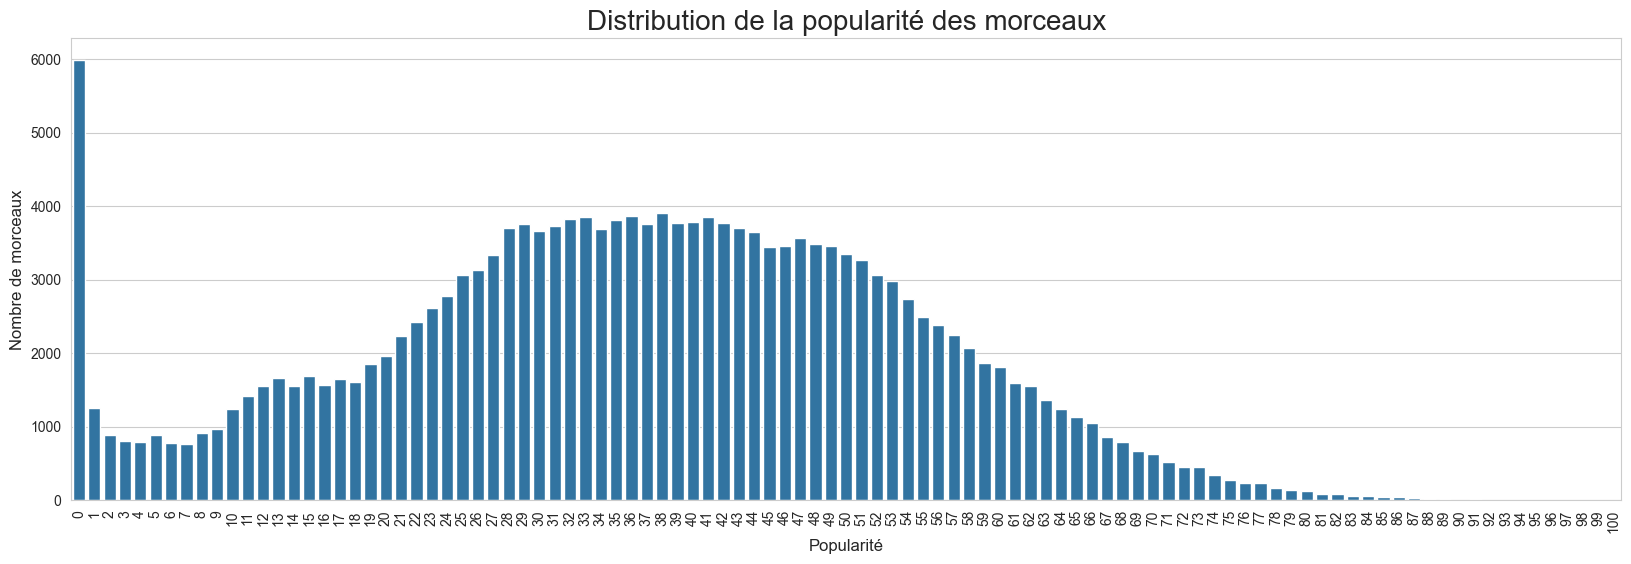

In [309]:
plt.figure(figsize=(20, 6))  
sns.countplot(data=df,
              x='popularity')

plt.title('Distribution de la popularité des morceaux', fontsize=20)
plt.xlabel('Popularité', fontsize=12)
plt.ylabel('Nombre de morceaux', fontsize=12)
plt.xticks(rotation=90)  
plt.show()

Pour chaque titre de chanson unique (track_name) sélectionne la ligne ayant la popularité maximale (popularity) dans le DataFrame df.

In [310]:
df = df.loc[df.groupby('track_name')['popularity'].idxmax()]

On décide de ne garder que les scores au dessus de 20/100 de popularité.

In [311]:
df = df[df['popularity'] >= 20] 

In [312]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 119736 lignes.


##### ***Acousticness***

##### ***Danceability***

##### ***Duration ms***

##### ***Energy***

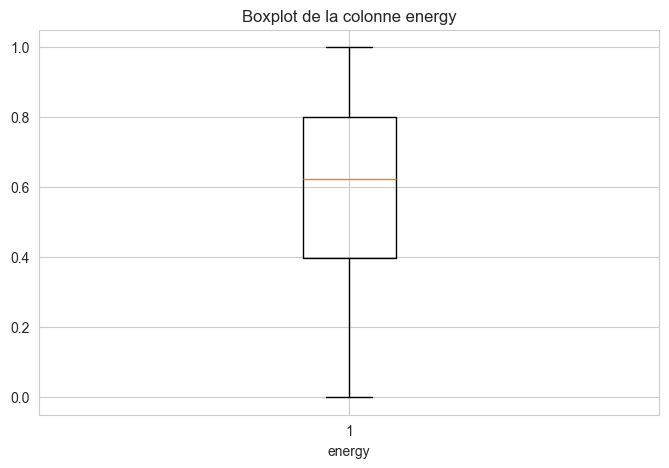

In [313]:
plt.figure(figsize=(8, 5))
plt.boxplot(x= df['energy'])

plt.title('Boxplot de la colonne energy')
plt.xlabel('energy')

plt.show()

- La médiane au-dessus de 0.6 montre que plus de la moitié des morceaux ont un niveau d’énergie modéré à élevé.
- Possible classification à réaliser morceaux en faible / moyenne / forte énergie pour répondre à l'activité

##### ***Instrumentalness***

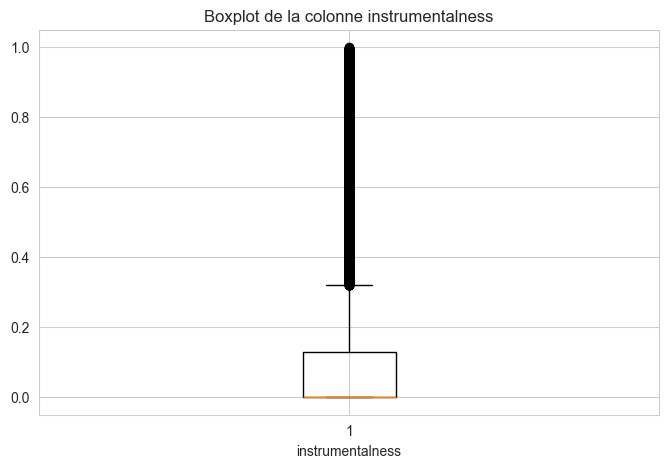

In [314]:
plt.figure(figsize=(8, 5))
plt.boxplot(x= df['instrumentalness'])

plt.title('Boxplot de la colonne instrumentalness')
plt.xlabel('instrumentalness')

plt.show()

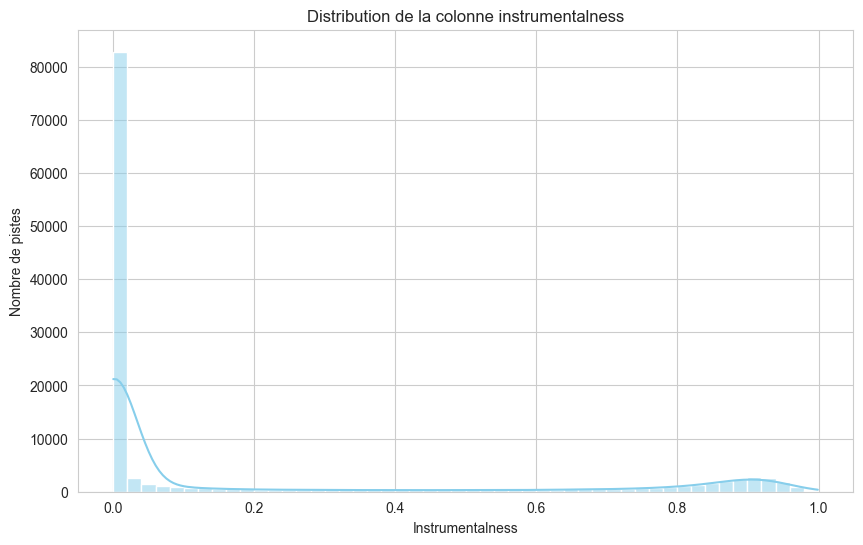

In [315]:
plt.figure(figsize=(10, 6))
sns.histplot(df['instrumentalness'], bins=50, kde=True, color='skyblue')

plt.title('Distribution de la colonne instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Nombre de pistes')
plt.grid(True)
plt.show()


- La base de données est largement dominée par des chansons vocales.
- Pas de nettoyage à réaliser.

##### ***Liveness***

In [316]:
df['liveness'].describe()

count    119736.000000
mean          0.215074
std           0.200693
min           0.010500
25%           0.096700
50%           0.127000
75%           0.263000
max           1.000000
Name: liveness, dtype: float64

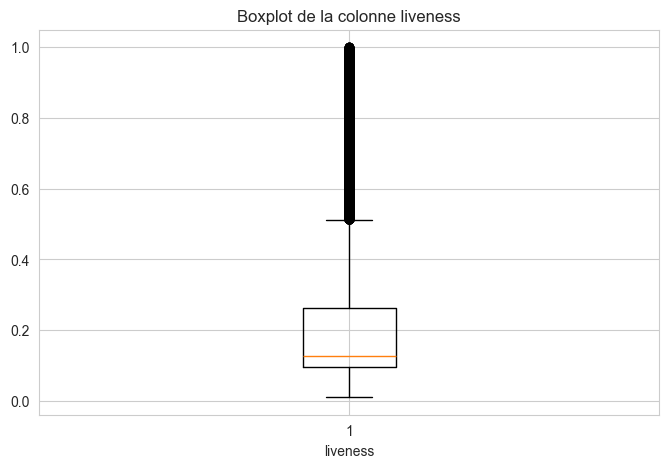

In [317]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['liveness'])

plt.title('Boxplot de la colonne liveness')
plt.xlabel('liveness')

plt.show()


- Le dataset est majoritairement composé de musique studio.
- Plus de 50 % des chansons n'ont que peu ou pas de caractéristiques live.
- Un seuil à 0.8 reste raisonnable pour retirer les vraies captations live.
- Un seuil à 0.5 "possiblement live"

In [318]:
df = df[df['liveness'] < 0.8]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4/4,0.0394,4/4
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3/4,0.0835,3/4
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4/4,0.3240,4/4
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4/4,0.4230,4/4
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4/4,0.7140,4/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4/4,0.6120,4/4
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4/4,0.1550,4/4
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4/4,0.6510,4/4
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4/4,0.2740,4/4


In [319]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 115560 lignes.


##### ***Tempo***

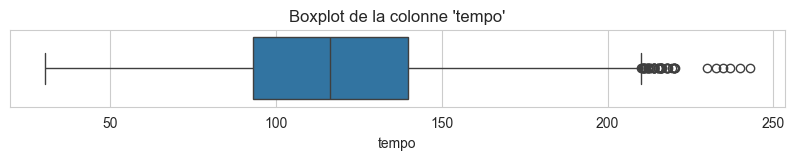

In [320]:
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['tempo'])
plt.title("Boxplot de la colonne 'tempo'")
plt.show()

In [321]:
# Calcul des bornes IQR
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Borne basse : {lower_bound:.2f}")
print(f"Borne haute : {upper_bound:.2f}")

Borne basse : 23.06
Borne haute : 210.07


In [322]:
# # on clean en gardant les valeurs entre les bornes
# df = df[(df['tempo'] >= 23.82) & (df['tempo'] <= 208.20)]
# df

In [323]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 115560 lignes.


In [324]:
df['tempo'].describe()

count    115560.000000
mean        118.186526
std          31.059197
min          30.379000
25%          93.191000
50%         116.273000
75%         139.942000
max         242.903000
Name: tempo, dtype: float64

In [325]:
df['tempo'].describe(percentiles= (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))

count    115560.000000
mean        118.186526
std          31.059197
min          30.379000
0%           30.379000
10%          79.958900
20%          89.813000
30%          96.805700
40%         105.908000
50%         116.273000
60%         125.043000
70%         134.124000
80%         144.878000
90%         163.981000
100%        242.903000
max         242.903000
Name: tempo, dtype: float64

In [326]:
df[df['tempo'] < 40].head(15)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
124661,classical,gustavo santaolalla,all gone (aftermath),05704F5Uk32MIb9tX5omWQ,44,0.986,0.2390,64440,0.0607,0.685000,E,0.1130,-22.497,Minor,0.0417,38.137,4/4,0.0372,4/4
176915,jazz,chad lawson trio,angels we have heard on high,5wcHHljUfrBxJh3Uk42u4m,38,0.949,0.5850,173520,0.2210,0.813000,D,0.1060,-18.264,Minor,0.0513,36.970,4/4,0.2830,4/4
177797,jazz,nat king cole,away in a manger,22hVlcdlfqmtOuEih4hZcH,35,0.971,0.3760,120400,0.1520,0.000099,G#,0.1050,-18.377,Major,0.0326,34.765,3/4,0.2530,3/4
147309,jazz,flughand,beems,7HH4IZ5FJt5djG0BnZpr5S,43,0.593,0.4930,77423,0.1360,0.036900,F,0.1230,-12.180,Minor,0.4410,37.833,4/4,0.7700,4/4
171852,comedy,tom papa,better generation,5WHVNhKaxVDxbq1HBi8ODI,20,0.643,0.7090,95606,0.6560,0.000000,E,0.6210,-14.078,Major,0.9490,36.219,3/4,0.4090,3/4
174919,comedy,alan saldaña,como te defiendes de un fantasma - ao vivo,4tp95KR161N0912Of0AN47,22,0.925,0.4940,178104,0.7070,0.000000,C#,0.7260,-9.292,Major,0.9560,36.355,4/4,0.5820,4/4
58845,opera,tomaso albinoni,"concerto for 2 oboes in f major, op. 9, no. 3:...",4nw7XaMNG2AeBKJXHl6exk,24,0.932,0.3220,131507,0.1420,0.856000,D,0.1600,-18.834,Minor,0.0382,37.099,4/4,0.1200,4/4
126200,classical,antonio vivaldi,"concerto in d major ""il gardellino"", rv428 : i...",20AHRp69y5gBuei8BUcBbK,35,0.911,0.3530,158827,0.0126,0.126000,C#,0.0665,-26.902,Major,0.0356,37.356,4/4,0.3970,4/4
104729,classical,ludwig van beethoven,"diabelli variations, op. 120: var. 7, un poco ...",5Wb7qMjogMRxLKXaHEyt4r,22,0.975,0.2540,79587,0.2410,0.889000,C,0.1200,-19.764,Major,0.0360,34.347,3/4,0.1930,3/4
169667,comedy,george lopez,dick in your corn flakes,65yn9SDi3y8B56b7Y79h1K,24,0.813,0.6540,83065,0.8430,0.000000,G#,0.6830,-13.895,Major,0.8970,35.968,3/4,0.0660,3/4


In [327]:
# Tempo > 40bpm : pas d'erreurs manifestes constatées
# Ne pas supprimer les lignes

In [328]:
df[df['tempo'] >= 200]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
45774,blues,otis redding,(sittin' on) the dock of the bay,50uGbeaQIxKiSc7jvRTjWx,63,0.72600,0.486,166827,0.312,0.000002,D,0.0601,-13.522,Major,0.0533,205.917,4/4,0.598,4/4
216322,country,ronnie milsap,(there's) no gettin' over me,2ZBey93WnEJiK6dq9fNNeW,44,0.54900,0.599,196293,0.470,0.000025,F#,0.3040,-10.477,Minor,0.0337,200.631,4/4,0.811,4/4
178254,jazz,nancy wilson,(you don't know) how glad i am,4YkN3JlceD5n2aMqL1kFnH,40,0.73700,0.326,157387,0.441,0.000010,F,0.3280,-9.117,Major,0.0479,208.072,3/4,0.622,3/4
143657,indie,the districts,4th and roebling,2RpMHnKzl9tUM8I7DBsjqJ,47,0.00241,0.264,289600,0.654,0.011100,C#,0.1230,-6.420,Minor,0.0697,206.744,4/4,0.277,4/4
1976,country,aaron lewis,75,5nZ1p0NXZwPxF9nDxhVrW3,42,0.32100,0.295,342000,0.460,0.003730,D#,0.2030,-6.310,Major,0.0280,200.104,3/4,0.358,3/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35430,anime,ai otsuka,大好きだよ。,5R4wugcX7fupglixKuYl0u,28,0.70700,0.245,282400,0.412,0.000000,F#,0.1430,-5.929,Minor,0.0334,206.101,3/4,0.465,3/4
32047,anime,silent siren,恋のエスパー,5eeIMlpmBKo7bOvU118yA5,33,0.00170,0.538,230653,0.944,0.009830,C,0.0774,-2.490,Major,0.0690,200.057,4/4,0.796,4/4
35201,anime,keytalk,暁のザナドゥ,0DUArzYdyGEbTVZlRzsili,27,0.00235,0.283,194733,0.967,0.000000,B,0.3310,-2.206,Major,0.1570,203.103,4/4,0.415,4/4
30981,anime,glay,空が青空であるために,6wfYng9wQprhKrpSJlvkqL,37,0.01890,0.292,245973,0.921,0.000000,D,0.3650,-3.308,Major,0.0658,200.082,4/4,0.411,4/4


In [329]:
# Otis Redding - (sittin' on) the dock of the bay : 
# problème sur le tempo du Dataset. Morceaix généralement joué 170bpm et en version lente à 85bpm

In [330]:
df[(df['tempo'] >= 215) & (df['tempo'] <= 225)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
24422,electronic,flux pavilion,blow the roof,1DZfcSkibPHM9h8lPFT7LT,40,0.003510,0.517,247693,0.9780,0.403000,A,0.0848,-4.053,Major,0.3810,220.169,4/4,0.3800,4/4
31767,anime,nobuo uematsu,"breezy (from ""final fantasy 8"")",2hrMvN4oM3292cRKQnyun8,24,0.993000,0.331,162934,0.0801,0.937000,D,0.0814,-27.799,Major,0.1040,215.359,4/4,0.1960,4/4
31189,anime,yasuharu takanashi,chou akuukan mahou anima,4Xql32yBFzL5BgIUvykLQw,20,0.290000,0.244,93267,0.4410,0.677000,A#,0.3060,-8.445,Major,0.0322,215.951,4/4,0.3750,4/4
215222,country,johnny cash,"cry, cry, cry - 1988 version",4CKjTXDDWIrS0cwSA9scgk,48,0.195000,0.508,145733,0.6480,0.000000,E,0.0895,-14.519,Major,0.0569,217.538,4/4,0.7680,4/4
3705,country,carrie underwood,cupid's got a shotgun,24w0eusbTsyhPkJj72LUIm,43,0.157000,0.306,223427,0.9500,0.000001,F,0.2390,-2.057,Minor,0.1490,216.029,4/4,0.7500,4/4
163537,reggaeton,ñejo & dalmata,eso que tienes tu,1Yq7rW79e6HvJa3EZJcb6g,27,0.023500,0.655,247625,0.9410,0.029800,A,0.2880,-8.641,Minor,0.0821,219.962,4/4,0.5590,4/4
226383,rock,angels & airwaves,everything's magic,3I7IGPFe0DoNXZI9JDYa5P,51,0.000100,0.407,231413,0.9350,0.000094,C,0.1510,-3.252,Major,0.0481,215.917,4/4,0.8360,4/4
189953,ska,less than jake,in-dependence day,7eRw0DPxDhftzRlSZNg01L,21,0.187000,0.318,168000,0.9820,0.000001,A,0.1460,-2.210,Major,0.1340,219.967,4/4,0.5530,4/4
51587,blues,zz top,jesus just left chicago,1T9Lnts2NnI5Qlo3mV7p0m,28,0.123000,0.357,208227,0.4550,0.172000,C,0.1240,-14.848,Major,0.0593,216.051,3/4,0.6780,3/4
46871,blues,zz top,jesus just left chicago - 2006 remaster,4tYjuquiKvx2Pq6usRTVWB,47,0.085300,0.340,210253,0.5980,0.118000,C,0.0969,-9.668,Major,0.0741,215.918,3/4,0.6970,3/4


In [331]:
# Beach House - Lazuli : 
# erreur sur tempo (site musicstax : 109,5bpm), dataset : 219bpm

In [332]:
df[(df['tempo'] >= 225) & (df['tempo'] <= 250)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
159197,reggaeton,lirico en la casa,brum brum,7J2W6n9CZDPmSVRjvEqkCQ,48,0.272,0.530,172878,0.8730,0.000017,C#,0.2560,-6.801,Major,0.2580,234.923,4/4,0.885,4/4
48149,blues,j.j. cale,call the doctor,55ROr3cl3yi4YRBgfpDy1d,42,0.174,0.482,148333,0.1660,0.546000,C#,0.0979,-18.522,Minor,0.0465,242.903,3/4,0.653,3/4
66153,folk,grateful dead,candyman - 2013 remaster,4FJ0051ukEptZAhP01ExGV,43,0.261,0.332,373970,0.4230,0.000140,C,0.0716,-12.102,Major,0.0384,236.799,3/4,0.519,3/4
163763,reggaeton,el alfa,el calimete,2R5u5SD7HyLG0wfjLK2Cvy,24,0.252,0.702,223813,0.8730,0.001390,G,0.2560,-1.568,Major,0.0925,229.886,4/4,0.687,4/4
146020,jazz,tony bennett,o christmas tree,2VsCE6ui7N4IRzGIGT7Di8,53,0.949,0.445,207253,0.0982,0.000002,F#,0.1090,-14.339,Major,0.0576,232.690,4/4,0.085,4/4
178918,jazz,b-side,sky,5pA8zdnj8fWHzJMReuhmSq,36,0.260,0.461,201023,0.2310,0.872000,A,0.2180,-8.386,Major,0.2890,239.848,3/4,0.332,3/4


In [333]:
# JJ Cale - call the doctor : 
# tempo du Dataset (242.903) 
# alors que c'est un morceau plutôt mid-tempo (site https://musicstax.com : 121.5bpm)

In [334]:
df[(df['tempo'] >= 209.70) & (df['tempo'] <= 210)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
28003,anime,reol,b12,4I7Ifw9MXGipCFQntyn7td,40,0.00177,0.441,240649,0.967,0.00000,C#,0.4250,-1.986,Major,0.3100,209.941,4/4,0.697,4/4
60593,r&b,moss kena,be mine,3fRHF5rIccfq8qolH6eLQj,48,0.05360,0.383,202710,0.637,0.00000,C,0.5170,-5.752,Major,0.3340,209.707,4/4,0.532,4/4
17540,dance,miranda cosgrove,leave it all to me (theme from icarly),7CMIy0uwXyeBv2MvaEUJM1,55,0.00294,0.233,158413,0.800,0.00000,G,0.0594,-5.543,Major,0.1050,209.767,4/4,0.564,4/4
56625,r&b,k camp,lil bit,7bFElqzAlHXnnINRBXRQbK,56,0.43900,0.539,237720,0.634,0.00000,C#,0.6840,-11.285,Major,0.7040,209.711,3/4,0.698,3/4
101292,children's music,mon laferte,si tú me quisieras,7EySX8ldJHoeWjJhJyZ8Tq,62,0.45800,0.317,202333,0.745,0.00000,F,0.3380,-6.479,Major,0.1620,209.795,4/4,0.621,4/4
51810,blues,beth hart,soul on fire,3JydVM40nMUKs739USb7aF,33,0.07090,0.241,302933,0.572,0.00244,C#,0.0848,-6.341,Major,0.0332,209.826,3/4,0.292,3/4
71849,children's music,storybots,where do french fries come from?,2xguCCO4Sig3QDCXGY5Wb9,22,0.21800,0.629,63151,0.750,0.00000,G,0.3060,-7.321,Major,0.0708,209.782,4/4,0.915,4/4
30296,anime,nobuo uematsu,who...ami?,24XKkO0w5XUQA8hwRbHqSO,26,0.23100,0.404,97507,0.360,0.02540,G,0.1200,-16.497,Major,0.0325,209.893,3/4,0.332,3/4
27916,anime,reol,ニュータイプトーキョー,1M5oAZm8pkNtArxy9zUxsQ,43,0.00137,0.514,210014,0.954,0.00000,B,0.2490,-3.033,Minor,0.1940,209.875,4/4,0.871,4/4


In [335]:
# Conclusion : les outliers identifiés (au delà de la borne hote : 209,70 bpm) sont bien à supprimer

In [336]:
# Suppression des outliers
df = df[df['tempo'] < 209.70]
df
        

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4/4,0.0394,4/4
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3/4,0.0835,3/4
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4/4,0.3240,4/4
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4/4,0.4230,4/4
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4/4,0.7140,4/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4/4,0.6120,4/4
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4/4,0.1550,4/4
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4/4,0.6510,4/4
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4/4,0.2740,4/4


In [337]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 115501 lignes.


Cela signifie que toutes les valeurs de tempo en dehors de cet intervalle sont considérées comme des outliers (valeurs aberrantes).

##### ***Loudness***

- Norme = Note comprise entre -60db et 0db.
- Moyenne (-9.569885) et médiane (-7.762000) prochent, donc faible dispersion des valeurs.
- Écart important (env. 40 points) entre la valeur minimale (-52.457000) et le 1er quartile (-11.771000). 
- La majorité des valuers se situent donc en deça du 1er quartile (25%). (au dessus non?)

- LOUDNESS (en dB, valeurs négatives)
- Moyenne -9.57 dB, médiane -7.76 dB
- 25% des morceaux < -11.77 dB : musique douce/intime
- Corrélation forte avec energy : variable redondante potentielle

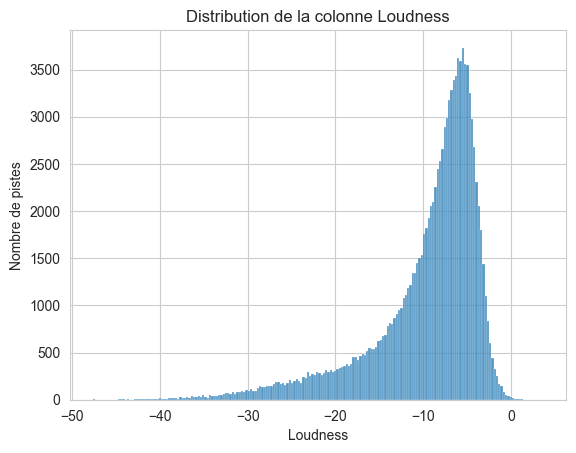

In [338]:
counts_loudness = df['loudness'].value_counts()
sns.histplot(data=df, x='loudness')
plt.title('Distribution de la colonne Loudness')
plt.xlabel('Loudness')
plt.ylabel('Nombre de pistes')
plt.show()

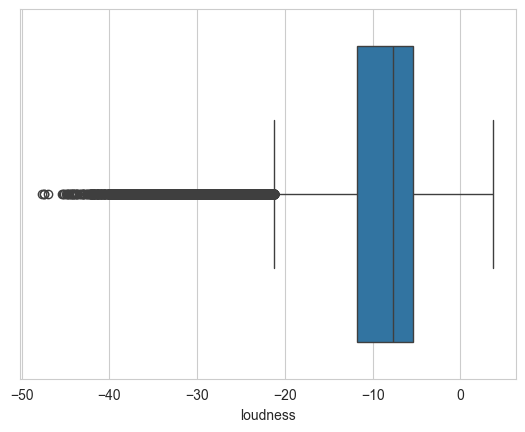

In [339]:
# Affichage d'une boite à moustache pour la variable "loudness"
# Mettre en évidence la présence d'outliers

sns.boxplot (data=df, x="loudness")
plt.show()

In [340]:
df = df[df['loudness'] <= 0]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4/4,0.0394,4/4
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3/4,0.0835,3/4
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4/4,0.3240,4/4
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4/4,0.4230,4/4
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4/4,0.7140,4/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4/4,0.6120,4/4
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4/4,0.1550,4/4
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4/4,0.6510,4/4
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4/4,0.2740,4/4


In [341]:
df = df[df['loudness'] > -25]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,time_signature_clean
58300,opera,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4/4,0.0394,4/4
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3/4,0.0835,3/4
89661,hip-hop,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4/4,0.3240,4/4
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4/4,0.4230,4/4
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4/4,0.7140,4/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4/4,0.6120,4/4
219320,world,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4/4,0.1550,4/4
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4/4,0.6510,4/4
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4/4,0.2740,4/4


In [342]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 110872 lignes.


##### ***Speechiness***

In [343]:
df["speechiness"].describe().T

count    110872.000000
mean          0.102667
std           0.146346
min           0.022200
25%           0.036100
50%           0.048700
75%           0.096800
max           0.967000
Name: speechiness, dtype: float64

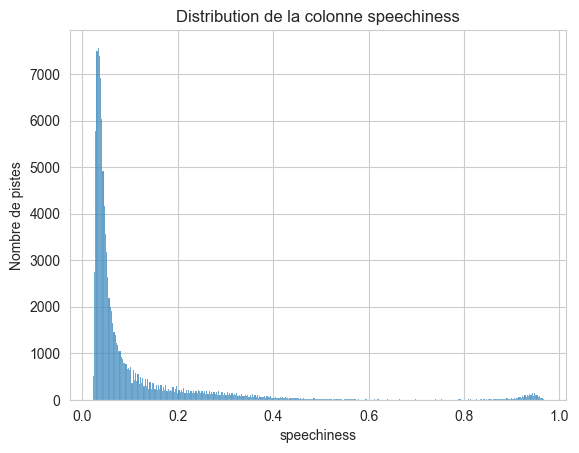

In [344]:
counts_key = df['speechiness'].value_counts()
sns.histplot(data=df, x="speechiness")
plt.title('Distribution de la colonne speechiness')
plt.xlabel('speechiness')
plt.ylabel('Nombre de pistes')
plt.show()

- On observe que la majorité des morceaux ont une "speechiness" faible (valeurs proches de 0).
- Les percentiles montrent que 90% des morceaux ont une valeur inférieure à 0.278, ce qui indique que les morceaux très "parlés" sont rares.
- La moyenne (mean) est de 0.120765, ce qui confirme que la plupart des morceaux contiennent peu de paroles selon ce critère.

In [345]:
df = df[df['speechiness']<=0.66]

In [346]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 108602 lignes.


##### ***Valence***

In [347]:
df['valence'].describe()

count    108602.000000
mean          0.470299
std           0.263524
min           0.017600
25%           0.250000
50%           0.466000
75%           0.684000
max           1.000000
Name: valence, dtype: float64

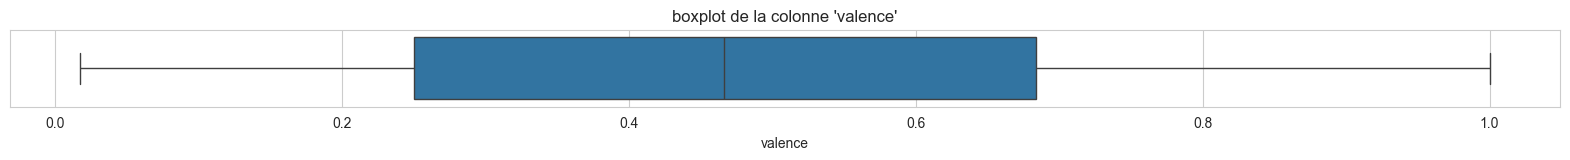

In [348]:
plt.figure(figsize=(20, 1))
sns.boxplot(x=df['valence'])
plt.title("boxplot de la colonne 'valence'")
plt.show()

Voir la corrélation avec le mode et peut être la clé.

# **Enrichissement**

- Réviser la colonne genre.
- agrémenter des paroles.
- agrémenter des pochettes d'album

**API LAST FM**

**SPOTIFY API**

**MUSICBRAINZ**

utiliser une API cache locale ou un dump JSON pré-téléchargé 

# **Analyse de corrélation**